In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Online Retail.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df['Country'].nunique()

38

In [5]:
df_cleaned = pd.read_csv('cleaneddata.csv')

In [6]:
df_cleaned.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
import datetime

In [8]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

In [14]:
d = df_cleaned['InvoiceDate'][0]

In [15]:
d

Timestamp('2010-12-01 08:26:00')

In [20]:
d.minute

26

In [9]:
df_cleaned['hour_of_the_day'] = df_cleaned['InvoiceDate'].map(lambda x: x.hour)

In [10]:
df_cleaned['months'] = df_cleaned['InvoiceDate'].map(lambda x: x.month)
df_cleaned['year'] = df_cleaned['InvoiceDate'].map(lambda x: x.year)

In [25]:
df_cleaned.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour_of_the_day,months,year
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,12,2010
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,2010
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,12,2010
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,2010
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,2010


In [26]:
from matplotlib import pyplot as plt

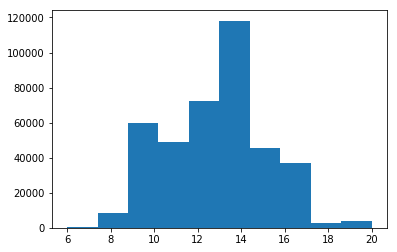

In [27]:
plt.hist(df_cleaned['hour_of_the_day'])
plt.show()

In [28]:
df_cleaned['InvoiceNo'].nunique()

18536

In [31]:
df_drop_dups = df_cleaned.copy()

In [32]:
df_drop_dups= df_drop_dups.drop_duplicates( 'InvoiceNo'  ,keep='first')

In [36]:
##df_drop_dups['InvoiceNo'].shape

In [34]:
df_drop_dups.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour_of_the_day,months,year
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,12,2010
7,7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,8,12,2010
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,8,12,2010
21,21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,8,12,2010
25,25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,8,12,2010


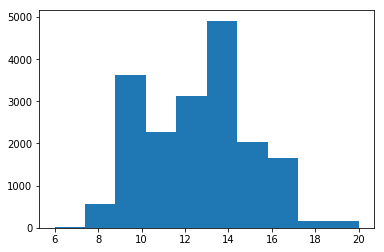

In [37]:
plt.hist(df_drop_dups['hour_of_the_day'])
plt.show()

## People tend to shop mostly btw 9-10, and 1-3 pm

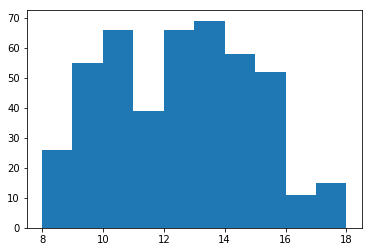

In [41]:
plt.hist(df_drop_dups.loc[(df_drop_dups['Country'] =='Germany' )     ,'hour_of_the_day'])
plt.show()

### Market Basket Analysis

In [11]:
df_cleaned.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour_of_the_day,months,year
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,12,2010
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,2010
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,12,2010
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,2010
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,2010


In [10]:
d = df_cleaned.loc[df_cleaned['InvoiceNo'] == 536365]

In [24]:
def get_products(key):
    d = df_cleaned.loc[df_cleaned['InvoiceNo'] == key]
    dd = d.T[d.T.index == 'Description']
    return dd

In [20]:
dd = d.T[d.T.index == 'Description']
dd

,0,1,2,3,4,5,6
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER


In [23]:
df_cleaned['InvoiceNo'].nunique()

18536

In [ ]:
# products_df = pd.DataFrame()
# for key in np.unique(df_cleaned['InvoiceNo']):
#     dd = get_products(key)
#     products_df = products_df.append(dd)

In [28]:
dd2 = d.T[d.T.index == 'Description']
dd = dd.append(dd2)
dd

,0,1,2,3,4,5,6
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER


In [27]:
##np.unique(df_cleaned['InvoiceNo'])

In [12]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [13]:
df = pd.read_csv('cleaneddata.csv')

In [14]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [15]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
import numpy as np
np.unique(df['Country'])

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA',
       'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland',
       'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'],
      dtype=object)

In [17]:
basket = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [18]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
## one hot encoding to ensure 'good' values in basket
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [26]:
## using minimum value for support as 70%
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True, max_len=2)

In [29]:
frequent_itemsets['itemsets'][22]

frozenset({'PLASTERS IN TIN WOODLAND ANIMALS',
           'ROUND SNACK BOXES SET OF4 WOODLAND'})

In [28]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951
1,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.245077,0.102845,0.070022,0.285714,2.778116,0.044817,1.256018


In [13]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.097686,0.095116,0.079692,0.815789,8.576814,0.070400,4.912229
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.095116,0.097686,0.079692,0.837838,8.576814,0.070400,5.564267
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.128535,0.138817,0.123393,0.960000,6.915556,0.105550,21.529563
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.138817,0.128535,0.123393,0.888889,6.915556,0.105550,7.843188
20,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102828,0.138817,0.100257,0.975000,7.023611,0.085983,34.447301
21,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102828,0.128535,0.100257,0.975000,7.585500,0.087040,34.858612
22,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.123393,0.133676,0.100257,0.812500,6.078125,0.083762,4.620394


In [14]:
basket['ALARM CLOCK BAKELIKE GREEN'].sum()

340.0

basket['ALARM CLOCK BAKELIKE RED'].sum()

316.0

316.0

In [32]:
basket = (df[df['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [33]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 CAKE CASES VINTAGE CHRISTMAS),(SET OF 20 VINTAGE CHRISTMAS NAPKINS),0.025767,0.027029,0.010271,0.398601,14.747366,0.009574,1.617848
1,(SET OF 20 VINTAGE CHRISTMAS NAPKINS),(60 CAKE CASES VINTAGE CHRISTMAS),0.027029,0.025767,0.010271,0.380000,14.747366,0.009574,1.571343
2,(60 TEATIME FAIRY CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.035257,0.026668,0.011772,0.333901,12.520543,0.010832,1.461242
3,(72 SWEETHEART FAIRY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.026668,0.035257,0.011772,0.441441,12.520543,0.010832,1.727201
4,(PACK OF 60 DINOSAUR CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.028530,0.035257,0.012313,0.431579,12.240814,0.011307,1.697232


In [ ]:
basket = (df[df['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [34]:
df['Country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [35]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2028
REGENCY CAKESTAND 3 TIER               1724
JUMBO BAG RED RETROSPOT                1618
ASSORTED COLOUR BIRD ORNAMENT          1408
PARTY BUNTING                          1397
LUNCH BAG RED RETROSPOT                1316
SET OF 3 CAKE TINS PANTRY DESIGN       1159
LUNCH BAG  BLACK SKULL.                1105
POSTAGE                                1099
PACK OF 72 RETROSPOT CAKE CASES        1068
PAPER CHAIN KIT 50'S CHRISTMAS         1019
SPOTTY BUNTING                         1017
LUNCH BAG SPACEBOY DESIGN              1008
LUNCH BAG CARS BLUE                     989
HEART OF WICKER SMALL                   985
NATURAL SLATE HEART CHALKBOARD          980
LUNCH BAG PINK POLKADOT                 957
REX CASH+CARRY JUMBO SHOPPER            952
LUNCH BAG SUKI DESIGN                   933
ALARM CLOCK BAKELIKE RED                899
LUNCH BAG APPLE DESIGN                  895
SET OF 4 PANTRY JELLY MOULDS            893
JUMBO BAG PINK POLKADOT         

In [39]:
df.loc[df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER', 'Country'].value_counts()

United Kingdom     1940
EIRE                 40
Spain                11
Netherlands           6
Cyprus                5
Italy                 5
Channel Islands       4
France                3
Finland               3
Singapore             2
Switzerland           2
Portugal              2
Israel                2
Malta                 1
Australia             1
Germany               1
Name: Country, dtype: int64

In [40]:
df.loc[df['Description'] == 'REGENCY CAKESTAND 3 TIER', 'Country'].value_counts()

United Kingdom          1426
EIRE                      65
Germany                   63
France                    49
Spain                     22
Belgium                   15
Switzerland               12
Norway                    10
Netherlands                9
Cyprus                     8
Australia                  6
Italy                      5
Channel Islands            5
Portugal                   5
Iceland                    4
Israel                     3
Austria                    2
Unspecified                2
USA                        2
Finland                    2
United Arab Emirates       1
Canada                     1
Singapore                  1
Greece                     1
Malta                      1
Lebanon                    1
Bahrain                    1
Brazil                     1
RSA                        1
Name: Country, dtype: int64

In [41]:
df.loc[df['Description'] == 'JUMBO BAG RED RETROSPOT', 'Country'].value_counts()

United Kingdom     1464
France               39
Germany              36
EIRE                 14
Netherlands          14
Belgium              10
Portugal              8
Channel Islands       6
Finland               6
Spain                 5
Australia             4
Switzerland           3
Singapore             2
USA                   1
Sweden                1
Italy                 1
Austria               1
Cyprus                1
Norway                1
RSA                   1
Name: Country, dtype: int64

In [42]:
df.loc[df['Description'] == 'ASSORTED COLOUR BIRD ORNAMENT', 'Country'].value_counts()

United Kingdom     1333
France               17
EIRE                 13
Spain                12
Germany              11
Portugal              4
Switzerland           3
Unspecified           3
Norway                2
Cyprus                2
Austria               2
Netherlands           2
Canada                1
Belgium               1
Italy                 1
Channel Islands       1
Name: Country, dtype: int64

In [43]:
df.loc[df['Description'] == 'PARTY BUNTING', 'Country'].value_counts()

United Kingdom     1308
France               22
EIRE                 19
Australia             8
Spain                 8
Switzerland           5
Germany               5
Channel Islands       3
Japan                 3
Cyprus                3
Norway                2
Finland               2
Belgium               2
Netherlands           1
Lebanon               1
Singapore             1
Denmark               1
Austria               1
Israel                1
RSA                   1
Name: Country, dtype: int64

In [44]:
basket = (df[df['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [48]:
basket_eire = (df[df['Country'] =="EIRE"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket_sets_eire = basket_eire.applymap(encode_units)
#basket_sets_eire.drop('POSTAGE', inplace=True, axis=1)

frequent_itemsets_eire = apriori(basket_sets_eire, min_support=0.01, use_colnames=True, max_len=2)
rules_eire = association_rules(frequent_itemsets_eire, metric="lift", min_threshold=1)

In [50]:
basket_Spain = (df[df['Country'] =="Spain"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket_sets_Spain = basket_Spain.applymap(encode_units)
#basket_sets_eire.drop('POSTAGE', inplace=True, axis=1)

frequent_itemsets_Spain = apriori(basket_sets_Spain, min_support=0.01, use_colnames=True, max_len=2)
rules_Spain = association_rules(frequent_itemsets_Spain, metric="lift", min_threshold=1)

In [51]:
basket_France = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket_sets_France = basket_France.applymap(encode_units)
#basket_sets_eire.drop('POSTAGE', inplace=True, axis=1)

frequent_itemsets_France = apriori(basket_sets_France, min_support=0.01, use_colnames=True, max_len=2)
rules_France = association_rules(frequent_itemsets_France, metric="lift", min_threshold=1)

In [52]:
basket_Germany = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket_sets_Germany = basket_Germany.applymap(encode_units)
#basket_sets_eire.drop('POSTAGE', inplace=True, axis=1)

frequent_itemsets_Germany = apriori(basket_sets_Germany, min_support=0.01, use_colnames=True, max_len=2)
rules_Germany = association_rules(frequent_itemsets_Germany, metric="lift", min_threshold=1)

In [55]:
rules_Germany.shape

(4188, 9)

### Checking product pairing across the countries

In [56]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 CAKE CASES VINTAGE CHRISTMAS),(SET OF 20 VINTAGE CHRISTMAS NAPKINS),0.025767,0.027029,0.010271,0.398601,14.747366,0.009574,1.617848
1,(SET OF 20 VINTAGE CHRISTMAS NAPKINS),(60 CAKE CASES VINTAGE CHRISTMAS),0.027029,0.025767,0.010271,0.380000,14.747366,0.009574,1.571343
2,(60 TEATIME FAIRY CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.035257,0.026668,0.011772,0.333901,12.520543,0.010832,1.461242
3,(72 SWEETHEART FAIRY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.026668,0.035257,0.011772,0.441441,12.520543,0.010832,1.727201
4,(PACK OF 60 DINOSAUR CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.028530,0.035257,0.012313,0.431579,12.240814,0.011307,1.697232


In [58]:
rules['antecedents'].unique()

array([frozenset({'60 CAKE CASES VINTAGE CHRISTMAS'}),
       frozenset({'SET OF 20 VINTAGE CHRISTMAS NAPKINS'}),
       frozenset({'60 TEATIME FAIRY CAKE CASES'}),
       frozenset({'72 SWEETHEART FAIRY CAKE CASES'}),
       frozenset({'PACK OF 60 DINOSAUR CAKE CASES'}),
       frozenset({'PACK OF 60 PINK PAISLEY CAKE CASES'}),
       frozenset({'PACK OF 72 RETROSPOT CAKE CASES'}),
       frozenset({'ALARM CLOCK BAKELIKE GREEN'}),
       frozenset({'ALARM CLOCK BAKELIKE CHOCOLATE'}),
       frozenset({'ALARM CLOCK BAKELIKE RED'}),
       frozenset({'ALARM CLOCK BAKELIKE IVORY'}),
       frozenset({'ALARM CLOCK BAKELIKE ORANGE'}),
       frozenset({'ALARM CLOCK BAKELIKE PINK'}),
       frozenset({'ASSORTED COLOUR BIRD ORNAMENT'}),
       frozenset({'PAINTED METAL PEARS ASSORTED'}),
       frozenset({'PARTY BUNTING'}),
       frozenset({'REGENCY CAKESTAND 3 TIER'}),
       frozenset({'WHITE HANGING HEART T-LIGHT HOLDER'}),
       frozenset({'BAKING SET SPACEBOY DESIGN'}),
       frozens

In [63]:
uk_whitehanger = rules[rules['antecedents'] == frozenset({'WHITE HANGING HEART T-LIGHT HOLDER'})]

In [64]:
eire_whitehanger = rules_eire[rules_eire['antecedents'] == frozenset({'WHITE HANGING HEART T-LIGHT HOLDER'})]

C:\Users\Preetika\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Preetika\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Preetika\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


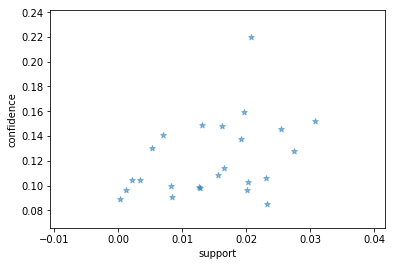

In [74]:
support=uk_whitehanger.as_matrix(columns=['support'])
confidence=uk_whitehanger.as_matrix(columns=['confidence'])
lift=uk_whitehanger.as_matrix(columns=['lift'])
import random
import matplotlib.pyplot as plt

for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [66]:
spain_whitehanger = rules_Spain[rules_Spain['antecedents'] == frozenset({'WHITE HANGING HEART T-LIGHT HOLDER'})]

In [67]:
spain_whitehanger

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1246,(WHITE HANGING HEART T-LIGHT HOLDER),(3 PIECE SPACEBOY COOKIE CUTTER SET),0.122222,0.022222,0.011111,0.090909,4.090909,0.008395,1.075556
2128,(WHITE HANGING HEART T-LIGHT HOLDER),(3 TRADITIONAl BISCUIT CUTTERS SET),0.122222,0.033333,0.011111,0.090909,2.727273,0.007037,1.063333
2346,(WHITE HANGING HEART T-LIGHT HOLDER),(3 WHITE CHOC MORRIS BOXED CANDLES),0.122222,0.033333,0.022222,0.181818,5.454545,0.018148,1.181481
3022,(WHITE HANGING HEART T-LIGHT HOLDER),(36 PENCILS TUBE SKULLS),0.122222,0.011111,0.011111,0.090909,8.181818,0.009753,1.087778
4188,(WHITE HANGING HEART T-LIGHT HOLDER),(4 TRADITIONAL SPINNING TOPS),0.122222,0.066667,0.011111,0.090909,1.363636,0.002963,1.026667
5077,(WHITE HANGING HEART T-LIGHT HOLDER),(6 GIFT TAGS VINTAGE CHRISTMAS),0.122222,0.044444,0.011111,0.090909,2.045455,0.005679,1.051111
6820,(WHITE HANGING HEART T-LIGHT HOLDER),(ABC TREASURE BOOK BOX),0.122222,0.011111,0.011111,0.090909,8.181818,0.009753,1.087778
7575,(WHITE HANGING HEART T-LIGHT HOLDER),(ALARM CLOCK BAKELIKE GREEN),0.122222,0.077778,0.011111,0.090909,1.168831,0.001605,1.014444
8478,(WHITE HANGING HEART T-LIGHT HOLDER),(ANTIQUE GLASS PLACE SETTING),0.122222,0.011111,0.011111,0.090909,8.181818,0.009753,1.087778
8784,(WHITE HANGING HEART T-LIGHT HOLDER),(ANTIQUE SILVER TEA GLASS ETCHED),0.122222,0.011111,0.011111,0.090909,8.181818,0.009753,1.087778


In [68]:
uk_whitehanger

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.11316,0.078083,0.015376,0.135881,1.740219,0.006540,1.066887
56,(WHITE HANGING HEART T-LIGHT HOLDER),(CANDLEHOLDER PINK HANGING HEART),0.11316,0.019040,0.014115,0.124735,6.551125,0.011960,1.120757
142,(WHITE HANGING HEART T-LIGHT HOLDER),(HEART OF WICKER LARGE),0.11316,0.047510,0.017178,0.151805,3.195191,0.011802,1.122960
146,(WHITE HANGING HEART T-LIGHT HOLDER),(HEART OF WICKER SMALL),0.11316,0.055739,0.015316,0.135350,2.428284,0.009009,1.092073
153,(WHITE HANGING HEART T-LIGHT HOLDER),(HOME BUILDING BLOCK WORD),0.11316,0.039822,0.012133,0.107219,2.692434,0.007627,1.075490
298,(WHITE HANGING HEART T-LIGHT HOLDER),(JUMBO BAG RED RETROSPOT),0.11316,0.086912,0.014475,0.127919,1.471824,0.004640,1.047022
340,(WHITE HANGING HEART T-LIGHT HOLDER),(LOVE BUILDING BLOCK WORD),0.11316,0.032074,0.010331,0.091295,2.846390,0.006701,1.065171
367,(WHITE HANGING HEART T-LIGHT HOLDER),(LUNCH BAG BLACK SKULL.),0.11316,0.059823,0.010872,0.096072,1.605930,0.004102,1.040101
418,(WHITE HANGING HEART T-LIGHT HOLDER),(LUNCH BAG CARS BLUE),0.11316,0.052976,0.010932,0.096603,1.823518,0.004937,1.048292
442,(WHITE HANGING HEART T-LIGHT HOLDER),(LUNCH BAG PINK POLKADOT),0.11316,0.050934,0.011472,0.101380,1.990420,0.005708,1.056137


In [75]:
spain_cakes3tier = rules_Spain[rules_Spain['antecedents'] == frozenset({'REGENCY CAKESTAND 3 TIER'})]

In [76]:
uk_cakes3tier = rules[rules['antecedents'] == frozenset({'REGENCY CAKESTAND 3 TIER'})]
eire_cakes3tier = rules_eire[rules_eire['antecedents'] == frozenset({'REGENCY CAKESTAND 3 TIER'})]
germany_cakes3tier = rules_Germany[rules_Germany['antecedents'] == frozenset({'REGENCY CAKESTAND 3 TIER'})]

In [77]:
uk_cakes3tier

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
38,(REGENCY CAKESTAND 3 TIER),(ASSORTED COLOUR BIRD ORNAMENT),0.08469,0.078083,0.012193,0.143972,1.843834,0.005580,1.076970
112,(REGENCY CAKESTAND 3 TIER),(GREEN REGENCY TEACUP AND SAUCER),0.08469,0.036759,0.019280,0.227660,6.193308,0.016167,1.247172
492,(REGENCY CAKESTAND 3 TIER),(PARTY BUNTING),0.08469,0.077542,0.011953,0.141135,1.820103,0.005386,1.074043
500,(REGENCY CAKESTAND 3 TIER),(PINK REGENCY TEACUP AND SAUCER),0.08469,0.029611,0.015917,0.187943,6.346993,0.013409,1.194976
524,(REGENCY CAKESTAND 3 TIER),(ROSES REGENCY TEACUP AND SAUCER),0.08469,0.040723,0.021142,0.249645,6.130304,0.017694,1.278431
526,(REGENCY CAKESTAND 3 TIER),(SET OF 3 CAKE TINS PANTRY DESIGN),0.08469,0.060484,0.010271,0.121277,2.005098,0.005149,1.069183
528,(REGENCY CAKESTAND 3 TIER),(SET OF 3 REGENCY CAKE TINS),0.08469,0.034416,0.010992,0.129787,3.771078,0.008077,1.109595
530,(REGENCY CAKESTAND 3 TIER),(WHITE HANGING HEART T-LIGHT HOLDER),0.08469,0.113160,0.013154,0.155319,1.372563,0.003570,1.049911


In [78]:
eire_cakes3tier

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
80,(REGENCY CAKESTAND 3 TIER),(20 DOLLY PEGS RETROSPOT),0.242308,0.030769,0.015385,0.063492,2.063492,0.007929,1.034941
96,(REGENCY CAKESTAND 3 TIER),(3 HOOK PHOTO SHELF ANTIQUE WHITE),0.242308,0.023077,0.011538,0.047619,2.063492,0.005947,1.025769
121,(REGENCY CAKESTAND 3 TIER),(3 TIER CAKE TIN GREEN AND CREAM),0.242308,0.030769,0.011538,0.047619,1.547619,0.004083,1.017692
144,(REGENCY CAKESTAND 3 TIER),(3 TIER CAKE TIN RED AND CREAM),0.242308,0.034615,0.015385,0.063492,1.834215,0.006997,1.030834
164,(REGENCY CAKESTAND 3 TIER),(3 TRADITIONAl BISCUIT CUTTERS SET),0.242308,0.030769,0.011538,0.047619,1.547619,0.004083,1.017692
194,(REGENCY CAKESTAND 3 TIER),(36 DOILIES VINTAGE CHRISTMAS),0.242308,0.030769,0.015385,0.063492,2.063492,0.007929,1.034941
282,(REGENCY CAKESTAND 3 TIER),(4 TRADITIONAL SPINNING TOPS),0.242308,0.061538,0.015385,0.063492,1.031746,0.000473,1.002086
346,(REGENCY CAKESTAND 3 TIER),(6 EGG HOUSE PAINTED WOOD),0.242308,0.053846,0.019231,0.079365,1.473923,0.006183,1.027719
380,(REGENCY CAKESTAND 3 TIER),(6 RIBBONS RUSTIC CHARM),0.242308,0.038462,0.011538,0.047619,1.238095,0.002219,1.009615
418,(REGENCY CAKESTAND 3 TIER),(60 CAKE CASES DOLLY GIRL DESIGN),0.242308,0.034615,0.019231,0.079365,2.292769,0.010843,1.048607


In [79]:
germany_cakes3tier

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
144,(REGENCY CAKESTAND 3 TIER),(6 RIBBONS RUSTIC CHARM),0.137856,0.102845,0.041575,0.301587,2.932455,0.027398,1.284563
272,(REGENCY CAKESTAND 3 TIER),(ALARM CLOCK BAKELIKE PINK),0.137856,0.070022,0.028446,0.206349,2.946925,0.018793,1.171772
304,(REGENCY CAKESTAND 3 TIER),(ALARM CLOCK BAKELIKE RED),0.137856,0.045952,0.013129,0.095238,2.072562,0.006794,1.054474
366,(REGENCY CAKESTAND 3 TIER),(BIG DOUGHNUT FRIDGE MAGNETS),0.137856,0.032823,0.017505,0.126984,3.868783,0.012981,1.107858
418,(REGENCY CAKESTAND 3 TIER),(BLUE HARMONICA IN BOX),0.137856,0.048140,0.015317,0.111111,2.308081,0.008681,1.070842
512,(REGENCY CAKESTAND 3 TIER),(BLUE POLKADOT CUP),0.137856,0.048140,0.010941,0.079365,1.648629,0.004305,1.033917
554,(REGENCY CAKESTAND 3 TIER),(BLUE SPOT CERAMIC DRAWER KNOB),0.137856,0.028446,0.013129,0.095238,3.347985,0.009208,1.073822
574,(REGENCY CAKESTAND 3 TIER),(BLUE STRIPE CERAMIC DRAWER KNOB),0.137856,0.028446,0.013129,0.095238,3.347985,0.009208,1.073822
624,(REGENCY CAKESTAND 3 TIER),(CAKE STAND 3 TIER MAGIC GARDEN),0.137856,0.019694,0.013129,0.095238,4.835979,0.010414,1.083496
648,(REGENCY CAKESTAND 3 TIER),(CARD CIRCUS PARADE),0.137856,0.037199,0.010941,0.079365,2.133520,0.005813,1.045801


In [82]:
uk_partybunty = rules[rules['antecedents'] == frozenset({'PARTY BUNTING'})]
eire_partybunty  = rules_eire[rules_eire['antecedents'] == frozenset({'PARTY BUNTING'})]
france_partybunty  = rules_France[rules_France['antecedents'] == frozenset({'PARTY BUNTING'})]
spain_partybunty  = rules_Spain[rules_Spain['antecedents'] == frozenset({'PARTY BUNTING'})]

In [83]:
uk_partybunty

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,(PARTY BUNTING),(ASSORTED COLOUR BIRD ORNAMENT),0.077542,0.078083,0.011112,0.143300,1.835229,0.005057,1.076126
294,(PARTY BUNTING),(JUMBO BAG RED RETROSPOT),0.077542,0.086912,0.010271,0.132455,1.524016,0.003532,1.052497
493,(PARTY BUNTING),(REGENCY CAKESTAND 3 TIER),0.077542,0.084690,0.011953,0.154144,1.820103,0.005386,1.082111
494,(PARTY BUNTING),(SPOTTY BUNTING),0.077542,0.054538,0.021563,0.278079,5.098830,0.017334,1.309648
497,(PARTY BUNTING),(WHITE HANGING HEART T-LIGHT HOLDER),0.077542,0.113160,0.016157,0.208366,1.841337,0.007382,1.120265


In [84]:
eire_partybunty

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48,(PARTY BUNTING),(15CM CHRISTMAS GLASS BALL 20 LIGHTS),0.073077,0.053846,0.011538,0.157895,2.932331,0.007604,1.123558
233,(PARTY BUNTING),(36 PENCILS TUBE RED RETROSPOT),0.073077,0.019231,0.011538,0.157895,8.210526,0.010133,1.164663
606,(PARTY BUNTING),(60 TEATIME FAIRY CAKE CASES),0.073077,0.080769,0.011538,0.157895,1.954887,0.005636,1.091587
980,(PARTY BUNTING),(ASSORTED COLOUR BIRD ORNAMENT),0.073077,0.050000,0.011538,0.157895,3.157895,0.007885,1.128125
1149,(PARTY BUNTING),(BAKING SET 9 PIECE RETROSPOT),0.073077,0.092308,0.015385,0.210526,2.280702,0.008639,1.149744
1275,(PARTY BUNTING),(BEWARE OF THE CAT METAL SIGN),0.073077,0.023077,0.011538,0.157895,6.842105,0.009852,1.160096
1322,(PARTY BUNTING),(BINGO SET),0.073077,0.057692,0.011538,0.157895,2.736842,0.007322,1.118990
1545,(PARTY BUNTING),(BLUE HAPPY BIRTHDAY BUNTING),0.073077,0.030769,0.015385,0.210526,6.842105,0.013136,1.227692
1583,(PARTY BUNTING),(BLUE HARMONICA IN BOX),0.073077,0.057692,0.011538,0.157895,2.736842,0.007322,1.118990
1904,(PARTY BUNTING),(BUNDLE OF 3 ALPHABET EXERCISE BOOKS),0.073077,0.030769,0.011538,0.157895,5.131579,0.009290,1.150962


In [85]:
france_partybunty

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
433,(PARTY BUNTING),(ALARM CLOCK BAKELIKE GREEN),0.056555,0.097686,0.010283,0.181818,1.861244,0.004758,1.102828
724,(PARTY BUNTING),(ALARM CLOCK BAKELIKE PINK),0.056555,0.102828,0.010283,0.181818,1.768182,0.004467,1.096544
888,(PARTY BUNTING),(ALARM CLOCK BAKELIKE RED),0.056555,0.095116,0.010283,0.181818,1.911548,0.004903,1.105970
1506,(PARTY BUNTING),(BUNDLE OF 3 ALPHABET EXERCISE BOOKS),0.056555,0.038560,0.010283,0.181818,4.715152,0.008102,1.175093
2128,(PARTY BUNTING),(CHILDREN'S SPACEBOY MUG),0.056555,0.028278,0.010283,0.181818,6.429752,0.008684,1.187661
2555,(PARTY BUNTING),(CHILDRENS DOLLY GIRL MUG),0.056555,0.023136,0.010283,0.181818,7.858586,0.008974,1.193945
2739,(PARTY BUNTING),(CIRCUS PARADE CHILDRENS EGG CUP),0.056555,0.056555,0.012853,0.227273,4.018595,0.009655,1.220928
2956,(PARTY BUNTING),(COFFEE MUG APPLES DESIGN),0.056555,0.069409,0.015424,0.272727,3.929293,0.011499,1.279563
3819,(PARTY BUNTING),(GUMBALL COAT RACK),0.056555,0.059126,0.012853,0.227273,3.843874,0.009510,1.217602
4328,(PARTY BUNTING),(JUMBO BAG RED RETROSPOT),0.056555,0.097686,0.010283,0.181818,1.861244,0.004758,1.102828


In [86]:
spain_partybunty

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
226,(PARTY BUNTING),(12 EGG HOUSE PAINTED WOOD),0.088889,0.011111,0.011111,0.125,11.250000,0.010123,1.130159
487,(PARTY BUNTING),(12 MESSAGE CARDS WITH ENVELOPES),0.088889,0.022222,0.011111,0.125,5.625000,0.009136,1.117460
936,(PARTY BUNTING),(3 HOOK PHOTO SHELF ANTIQUE WHITE),0.088889,0.011111,0.011111,0.125,11.250000,0.010123,1.130159
1728,(PARTY BUNTING),(3 TIER CAKE TIN RED AND CREAM),0.088889,0.022222,0.022222,0.250,11.250000,0.020247,1.303704
1984,(PARTY BUNTING),(3 TRADITIONAl BISCUIT CUTTERS SET),0.088889,0.033333,0.011111,0.125,3.750000,0.008148,1.104762
2585,(PARTY BUNTING),(36 FOIL HEART CAKE CASES),0.088889,0.033333,0.022222,0.250,7.500000,0.019259,1.288889
4037,(PARTY BUNTING),(4 TRADITIONAL SPINNING TOPS),0.088889,0.066667,0.011111,0.125,1.875000,0.005185,1.066667
4483,(PARTY BUNTING),(6 EGG HOUSE PAINTED WOOD),0.088889,0.011111,0.011111,0.125,11.250000,0.010123,1.130159
5213,(PARTY BUNTING),(6 RIBBONS ELEGANT CHRISTMAS),0.088889,0.011111,0.011111,0.125,11.250000,0.010123,1.130159
5804,(PARTY BUNTING),(6 RIBBONS RUSTIC CHARM),0.088889,0.166667,0.044444,0.500,3.000000,0.029630,1.666667


## top confidence and lift

In [89]:
rules[ (rules['lift'] >= 4) &
        (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
111,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029611,0.036759,0.024266,0.819473,22.293137,0.023177,5.335706
148,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.010751,0.010872,0.010151,0.944134,86.844687,0.010034,17.705400
149,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.010872,0.010751,0.010151,0.933702,86.844687,0.010034,14.921166
508,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE KITCHEN),0.015617,0.017298,0.012553,0.803846,46.469565,0.012283,5.009852
511,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE BEDROOM),0.012553,0.015617,0.010151,0.808612,51.779187,0.009955,5.143404
512,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE KITCHEN),0.012553,0.017298,0.010691,0.851675,49.234483,0.010474,6.625311
532,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE ROSES),0.013634,0.015977,0.011532,0.845815,52.939750,0.011314,6.382092
587,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.014896,0.024086,0.012493,0.838710,34.822138,0.012134,6.050670


In [90]:
rules_Spain[ (rules_Spain['lift'] >= 4) &
        (rules_Spain['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(BLACK LOVE BIRD T-LIGHT HOLDER),(10 COLOUR SPACEBOY PEN),0.011111,0.022222,0.011111,1.0,45.000000,0.010864,inf
10,(BOX OF 6 MINI 50'S CRACKERS),(10 COLOUR SPACEBOY PEN),0.011111,0.022222,0.011111,1.0,45.000000,0.010864,inf
16,(COSY HOUR CIGAR BOX MATCHES),(10 COLOUR SPACEBOY PEN),0.011111,0.022222,0.011111,1.0,45.000000,0.010864,inf
23,(HOT WATER BOTTLE KEEP CALM),(10 COLOUR SPACEBOY PEN),0.011111,0.022222,0.011111,1.0,45.000000,0.010864,inf
28,(10 COLOUR SPACEBOY PEN),(JAM MAKING SET WITH JARS),0.022222,0.155556,0.022222,1.0,6.428571,0.018765,inf
32,(KEY RING BASEBALL BOOT UNION JACK),(10 COLOUR SPACEBOY PEN),0.011111,0.022222,0.011111,1.0,45.000000,0.010864,inf
39,(PAPER POCKET TRAVELING FAN),(10 COLOUR SPACEBOY PEN),0.011111,0.022222,0.011111,1.0,45.000000,0.010864,inf
40,(PINK & WHITE BREAKFAST TRAY),(10 COLOUR SPACEBOY PEN),0.011111,0.022222,0.011111,1.0,45.000000,0.010864,inf
45,(POLKADOT RAIN HAT),(10 COLOUR SPACEBOY PEN),0.011111,0.022222,0.011111,1.0,45.000000,0.010864,inf
51,(REGENCY CAKE FORK),(10 COLOUR SPACEBOY PEN),0.011111,0.022222,0.011111,1.0,45.000000,0.010864,inf


In [121]:
#basket_Spain
print(basket_Spain['BAKING MOULD HEART WHITE CHOCOLATE'].sum())
print(basket_Spain['SPOTTY BUNTING'].sum())

3.0
52.0


In [114]:
rules_Spain[rules_Spain['consequents'] == frozenset({'BAKING MOULD HEART WHITE CHOCOLATE'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
126,(12 EGG HOUSE PAINTED WOOD),(BAKING MOULD HEART WHITE CHOCOLATE),0.011111,0.011111,0.011111,1.000000,90.000000,0.010988,inf
368,(12 MESSAGE CARDS WITH ENVELOPES),(BAKING MOULD HEART WHITE CHOCOLATE),0.022222,0.011111,0.011111,0.500000,45.000000,0.010864,1.977778
1833,(3 TRADITIONAl BISCUIT CUTTERS SET),(BAKING MOULD HEART WHITE CHOCOLATE),0.033333,0.011111,0.011111,0.333333,30.000000,0.010741,1.483333
4382,(6 EGG HOUSE PAINTED WOOD),(BAKING MOULD HEART WHITE CHOCOLATE),0.011111,0.011111,0.011111,1.000000,90.000000,0.010988,inf
5112,(6 RIBBONS ELEGANT CHRISTMAS),(BAKING MOULD HEART WHITE CHOCOLATE),0.011111,0.011111,0.011111,1.000000,90.000000,0.010988,inf
6199,(6 RIBBONS SHIMMERING PINKS),(BAKING MOULD HEART WHITE CHOCOLATE),0.022222,0.011111,0.011111,0.500000,45.000000,0.010864,1.977778
9926,(ASSTD DESIGN 3D PAPER STICKERS),(BAKING MOULD HEART WHITE CHOCOLATE),0.011111,0.011111,0.011111,1.000000,90.000000,0.010988,inf
10145,(ASSTD DESIGN RACING CAR PEN),(BAKING MOULD HEART WHITE CHOCOLATE),0.011111,0.011111,0.011111,1.000000,90.000000,0.010988,inf
10360,(BABY BOOM RIBBONS),(BAKING MOULD HEART WHITE CHOCOLATE),0.033333,0.011111,0.011111,0.333333,30.000000,0.010741,1.483333
10764,(BAKING MOULD CHOCOLATE CUPCAKES),(BAKING MOULD HEART WHITE CHOCOLATE),0.044444,0.011111,0.011111,0.250000,22.500000,0.010617,1.318519


In [93]:
rules_France[ (rules_France['lift'] >= 4) &
        (rules_France['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,(12 COLOURED PARTY BALLOONS),(SET OF 9 BLACK SKULL BALLOONS),0.015424,0.066838,0.012853,0.833333,12.467949,0.011823,5.598972
57,(12 PENCILS TALL TUBE WOODLAND),(12 PENCILS TALL TUBE RED RETROSPOT),0.015424,0.023136,0.012853,0.833333,36.018519,0.012497,5.861183
81,(36 PENCILS TUBE WOODLAND),(36 PENCILS TUBE RED RETROSPOT),0.023136,0.046272,0.020566,0.888889,19.209877,0.019495,8.583548
155,(BINGO SET),(4 TRADITIONAL SPINNING TOPS),0.010283,0.071979,0.010283,1.000000,13.892857,0.009543,inf
290,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE PINK),0.028278,0.102828,0.023136,0.818182,7.956818,0.020229,4.934447
292,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.028278,0.095116,0.023136,0.818182,8.601966,0.020447,4.976864
329,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.030848,0.097686,0.025707,0.833333,8.530702,0.022693,5.413882
334,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.097686,0.095116,0.079692,0.815789,8.576814,0.070400,4.912229
335,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.095116,0.097686,0.079692,0.837838,8.576814,0.070400,5.564267
507,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE RED),0.030848,0.095116,0.025707,0.833333,8.761261,0.022773,5.429306


In [123]:
print(basket_France['BAKING MOULD HEART WHITE CHOCOLATE'].sum())
print(basket_France['SPOTTY BUNTING'].sum())

6.0
99.0


In [131]:
basket_France.loc[(basket_France['BAKING MOULD HEART WHITE CHOCOLATE'] >0 ,'BAKING MOULD HEART WHITE CHOCOLATE' )]

InvoiceNo
547892    6.0
Name: BAKING MOULD HEART WHITE CHOCOLATE, dtype: float64

In [127]:
rules_France[rules_France['antecedents'] == frozenset({'SPOTTY BUNTING'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
491,(SPOTTY BUNTING),(ALARM CLOCK BAKELIKE GREEN),0.043702,0.097686,0.010283,0.235294,2.408669,0.006014,1.179949
780,(SPOTTY BUNTING),(ALARM CLOCK BAKELIKE PINK),0.043702,0.102828,0.010283,0.235294,2.288235,0.005789,1.173225
4860,(SPOTTY BUNTING),(LUNCH BAG APPLE DESIGN),0.043702,0.125964,0.015424,0.352941,2.801921,0.009919,1.350783
5221,(SPOTTY BUNTING),(LUNCH BAG SPACEBOY DESIGN),0.043702,0.120823,0.010283,0.235294,1.947434,0.005003,1.149693
5605,(SPOTTY BUNTING),(LUNCH BOX WITH CUTLERY RETROSPOT),0.043702,0.143959,0.015424,0.352941,2.451681,0.009133,1.322973
5775,(SPOTTY BUNTING),(MINI LIGHTS WOODLAND MUSHROOMS),0.043702,0.051414,0.010283,0.235294,4.576471,0.008036,1.240459
6367,(SPOTTY BUNTING),(PARTY BUNTING),0.043702,0.056555,0.017995,0.411765,7.280749,0.015523,1.603856
6600,(SPOTTY BUNTING),(PLASTERS IN TIN CIRCUS PARADE),0.043702,0.169666,0.015424,0.352941,2.080214,0.008009,1.283244
6773,(SPOTTY BUNTING),(PLASTERS IN TIN SPACEBOY),0.043702,0.136247,0.012853,0.294118,2.158713,0.006899,1.223650
7293,(SPOTTY BUNTING),(POSTAGE),0.043702,0.771208,0.043702,1.000000,1.296667,0.009999,inf
